# Task 4

<i> Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

##  Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# Read The Data

In [2]:
df_train=pd.read_csv("twitter_training.csv")
df_test=pd.read_csv("twitter_validation.csv")

In [3]:
df_train.shape


(74681, 4)

In [5]:
df_train.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

#### Creating colums for unstructered prompts

In [6]:
col=['id','name','sentiment','content']

#### Inserting colums back into the datasets

In [7]:
df_train=pd.read_csv("twitter_training.csv",names=col)
df_test=pd.read_csv("twitter_validation.csv", names=col)

In [8]:
df_train.columns


Index(['id', 'name', 'sentiment', 'content'], dtype='object')

In [9]:
df_train.dtypes


id            int64
name         object
sentiment    object
content      object
dtype: object

#  Data Cleaning

In [10]:
df_train.isnull().sum()


id             0
name           0
sentiment      0
content      686
dtype: int64

In [12]:
df_train.dropna(subset=['content'] , inplace=True)


In [13]:
df_train.shape


(73996, 4)

In [17]:
df_train.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [19]:
df_test.sentiment.unique()

array(['Irrelevant', 'Neutral', 'Negative', 'Positive'], dtype=object)

#### Replacing irrelevant sentiment with neutral sentiment to better catagorise

In [21]:
df_train.sentiment=df_train.sentiment.replace('Irrelevant' , 'Neutral')
df_test.sentiment=df_test.sentiment.replace('Irrelevant' , 'Neutral')

In [104]:
df_train.Sentiment.unique()


array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [105]:
df_test.Sentiment.unique()


array(['Neutral', 'Negative', 'Positive'], dtype=object)

# Exploratary Data Analysis

## Sentiment


In [22]:
sentiment_count=df_train.sentiment.value_counts()
sentiment_count

sentiment
Neutral     30983
Negative    22358
Positive    20655
Name: count, dtype: int64

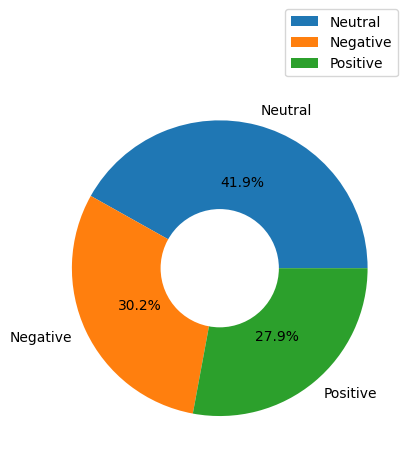

In [33]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(sentiment_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1, 1), loc='lower right')
plt.show()

In [35]:
df_train.name.unique()


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [39]:
name_count=df_train.name.value_counts()
name_count

name
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                  

In [43]:
name=name_count.sort_values(ascending=False).head(10)
name

name
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64

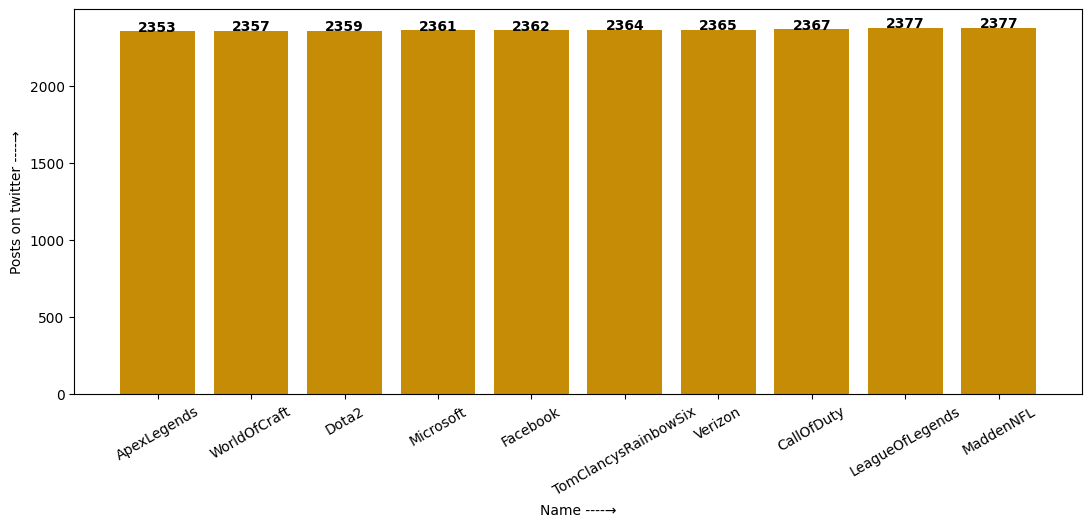

In [60]:
plt.figure(figsize=(13,5))

x=['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y=[2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y, color='#c78c06')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold')

plt.xticks(rotation=30)
plt.xlabel('Name ----→')
plt.ylabel('Posts on twitter ----→')
plt.show()

In [65]:
name_index = name.head(3)
name_index

name
MaddenNFL          2377
LeagueOfLegends    2377
CallOfDuty         2376
Name: count, dtype: int64

In [72]:
name_index_3 = name_index.index.tolist()
name_index_3

['MaddenNFL', 'LeagueOfLegends', 'CallOfDuty']

In [74]:
sentiment_by_name=df_train.loc[df_train['name'].isin(name_index_3)].groupby('name')['sentiment'].value_counts().sort_index()
sentiment_by_name

name             sentiment
CallOfDuty       Negative      883
                 Neutral      1047
                 Positive      446
LeagueOfLegends  Negative      632
                 Neutral      1130
                 Positive      615
MaddenNFL        Negative     1694
                 Neutral       287
                 Positive      396
Name: count, dtype: int64

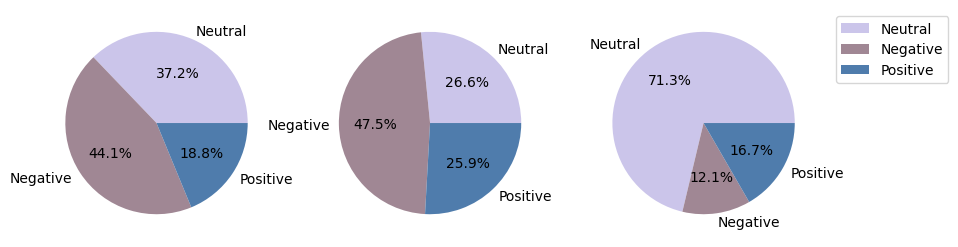

In [86]:
plt.figure(figsize=(10,5))

y=['Neutral' , 'Negative' , 'Positive']
color=['#CBC5EA' , '#A08794' , '#4F7CAC']

plt.subplot(1,3,1)
plt.pie(sentiment_by_name[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_name[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,3)
plt.pie(sentiment_by_name[6:] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")
